# **1. Objective**



Overview: Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories
into a cohesive case study that demonstrates their application in predicting an outcome based on
a given dataset.

Goal: Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression
models to analyze and interpret the results.

# **2. Dataset Preparation**

Description:

The Diabetes dataset is the one that will be used. Pregnancies, Blood Pressure, Insulin, BMI, Diabetes Pedigree Function, and Age are among the variables that make up this group of independent variables. The "Outcome" is the current dependent variable.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import RocCurveDisplay

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **3. Exploratory Data Analysis (EDA)**


Probability and Statistics Concepts:

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
diabetes.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

Visualization:

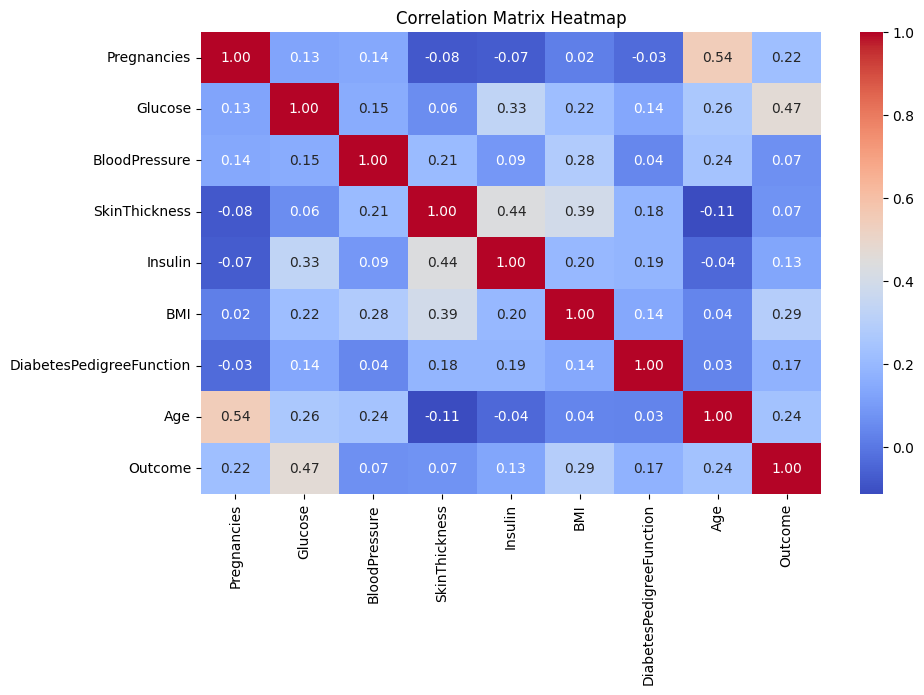

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **4. Linear Regression Model**

Theory Recap:

Linear Regression a tool modeling and prediction. It's particularly useful in understanding and modeling relationships between a dependent variable (target) and one or more independent variables (features or predictors).

Implementation:

In [ ]:
X = diabetes.drop('Outcome', axis=1)
Y = diabetes[['Outcome']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

LinearModel = LinearRegression()
LinearModel.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print("Model's Coefficients")
slope = LinearModel.coef_[0]
intercept = LinearModel.intercept_
print('Slope', slope)
print('Intercept', intercept)

Model's Coefficients
Slope [ 0.01046818  0.00563353 -0.00228103  0.00053209 -0.00027815  0.01503864
  0.11126264  0.00646027]
Intercept [-0.94875463]


Evaluation:

In [ ]:
Y_pred = LinearModel.predict(X_test)

In [ ]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.2550
Mean Squared Error: 0.17104527280850104
Root Mean Squared Error: 0.4135761995189049


# **5. Logistic Regression Model**

Theory Recap:

Logistic Regression is a statistical technique used for predicting the outcome of a categorical dependent variable based on one or more predictor variables. It models the probability of a binary event occurring, such as success/failure, yes/no, or pass/fail scenarios.

Implementation:

In [ ]:
x = diabetes.drop(['BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Outcome'], axis=1)
y = diabetes[['Outcome']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
LogisticModel = LogisticRegression()
LogisticModel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = LogisticModel.predict(x_test)
y_prob = LogisticModel.predict_proba(x_test)[:,1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test,y_prob)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)
print(f"ROC: {roc}")

Accuracy: 0.7402597402597403
Confusion Matrix: 
[[81 18]
 [22 33]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

ROC: 0.7957759412304867


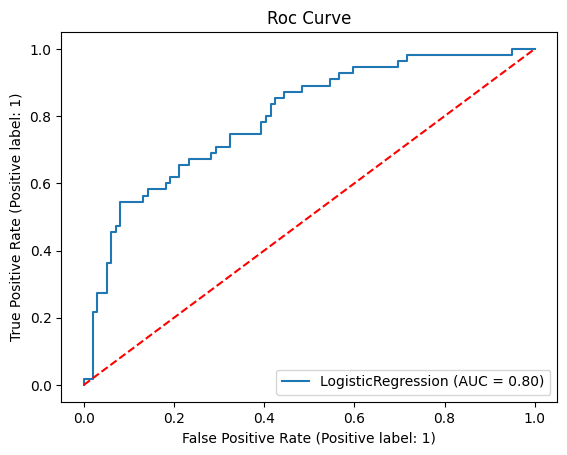

In [ ]:
RocCurveDisplay.from_estimator(LogisticModel,x_test,y_test)
plt.title("Roc Curve")
plt.plot([0,1],[0,1],'r--')
plt.show()

# **6. Model Comparison and Selection**

Both model is suitable for the given dataset, the linear regression model signifies low MSE with the value of 0.17104527280850104 that shows that linear regression is an astandard model for the given dataset. On the other hand the Logistic Regression has an Accuracy of  0.7402597402597403 which indicates a better classification model than the linear regression model as it shows how accurate and base on the given dataset, logistic regression is more suitable for it as it has the dependent variable outcome which has binary values.

> MSE: 0.17104527280850104 (Linear Regression)



> Accuracy: 0.7402597402597403 (Logistic Regression)



Considering the given data, I chose Logistic regression than linear for several reasons. First is the given dataset along with it columns consists of number that shows how suitable it is for Logistic Regression. Another consideration is the breakdown of Dependent and Independent variable that fits more into Logistic Regression. Lastly is base on results, Logistic model has more reliable results than the Linear one.

# **7. Conclusion and Insights**

**Linear Regression Model Summary**

Model's Coefficients

---


Slope   
* 0.01046818
* 0.00563353
* -0.00228103  
* 0.00053209
* -0.00027815  
* 0.01503864
*  0.11126264  
* 0.00646027




Intercept [-0.94875463]



---

R-squared: 0.2550

Mean Squared Error: 0.17104527280850104

Root Mean Squared Error: 0.4135761995189049


---



**Logistic Regression Model Summary**

Accuracy: 0.7402597402597403


---



Confusion Matrix: [[81 18] [22 33]]


---




Classification Report:
              
                precision    recall  f1-score   support

            0       0.79      0.82      0.80        99
            1       0.65      0.60      0.62        55

    accuracy                            0.74       154
    macro avg       0.72      0.71      0.71       154
    weighted avg    0.74      0.74      0.74       154


---


ROC: 0.7957759412304867

---

According to the Lecture, linear regression model is often applied in economics, finance and natural sciences; but Linear regression have more applications, it can be use in many things that needs to be understood the relationships of each and every variables.

Logistic Regression on the other hand can be use in fields such as Healthcare, Finance, Marketing, Social Sciences, Education, Human Resources and E-Commerce it is a versatile model by predicting the outcome of categorical dependent variable, it mostly lies on binary results.

Both models can be use but both models also have limitations and can not work on every data the same way. Some given data are suitable for Linear regression while some data is suitable for logistic regression. They are both versatile but also must be understand throughly to work with data properly


# **8. References**

*DHAKA, S. (2022). Diabetes [Dataset]. KAGGLE. https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners*

*Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2. (Publisher link).*

*Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.*

*McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).*

*J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.*

*Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.*

*Bernardino, M. (2024). Linear Regression (A Practical Guide for Data Science) [Slide show; Microsoft Powerpoint].*

*Bernardino, M. (2024). Logistic Regression (Bridging Statistics and Machine Learning) [Slide show; Microsoft Powerpoint].*